In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import os
plt.rcParams.update({'font.size': 18})

In [2]:
all_methods =['IT',
              'MP_APST_4']
raw_data = {}
for method in all_methods:
    raw_data[method] = pd.read_csv("RRG_"+method+".csv")

In [3]:
markers = ['-x', '-o', '-<', '->', '-X', '-D']

In [4]:
def plot_for_method(method: str, x_axis:str = "num_samples", x_pow:float = 1.0):
    method_data:pd.DataFrame = raw_data[method]

    if x_axis == "num_samples":
        legends = "V"
        shown_legend = "num. Switch"
        shown_x = "num. Sample"
    elif x_axis == "V":
        legends = "num_samples"
        shown_legend = "num. Sample"
        shown_x = "num. Switch"
    

    plt.figure()
    for i, le in enumerate(method_data[legends].unique()):
        filtered_data = method_data[method_data[legends]==le]
        x_series = (filtered_data[x_axis])**x_pow
        y_series = filtered_data["ave_time[s]"]
        std_series = filtered_data["std_time[s]"]
        plt.errorbar(x_series, y_series, std_series, fmt=markers[i], label=f"{shown_legend}={le}")

    plt.xlabel(shown_x+ f"^{x_pow}")
    plt.xlim(left=0)
    plt.ylabel("execution time [s]")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncols=3)
    plt.title(f"MD_Nexullance_{method}")

    # if x_axis=="V":
    #     plt.yscale('log')

        

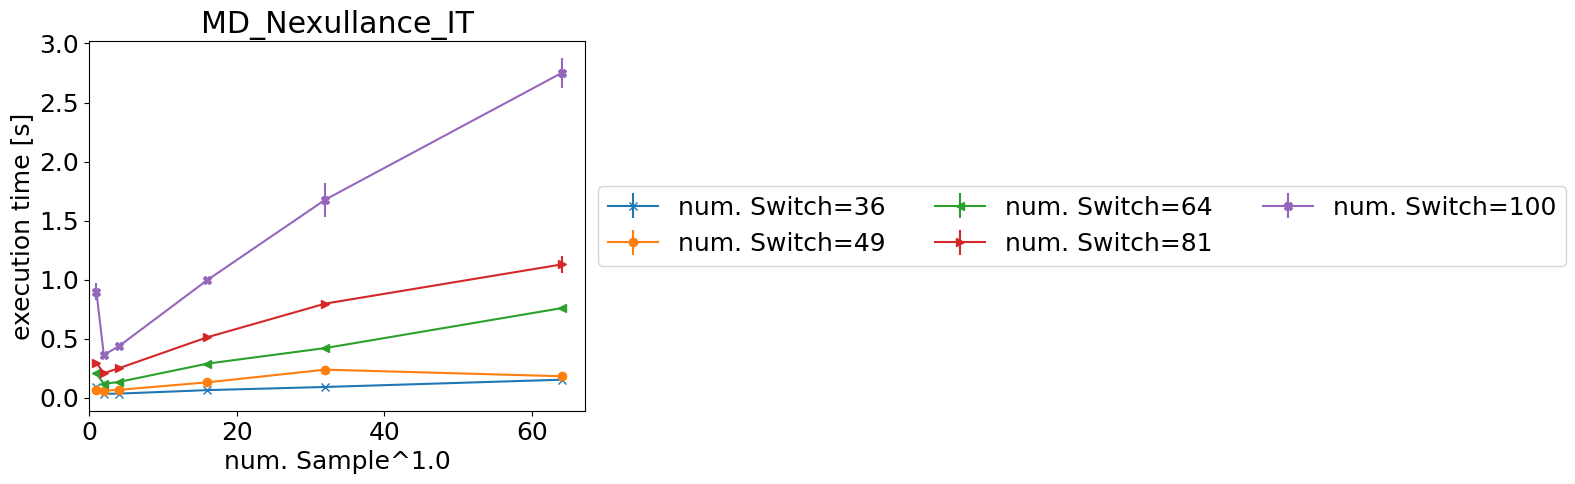

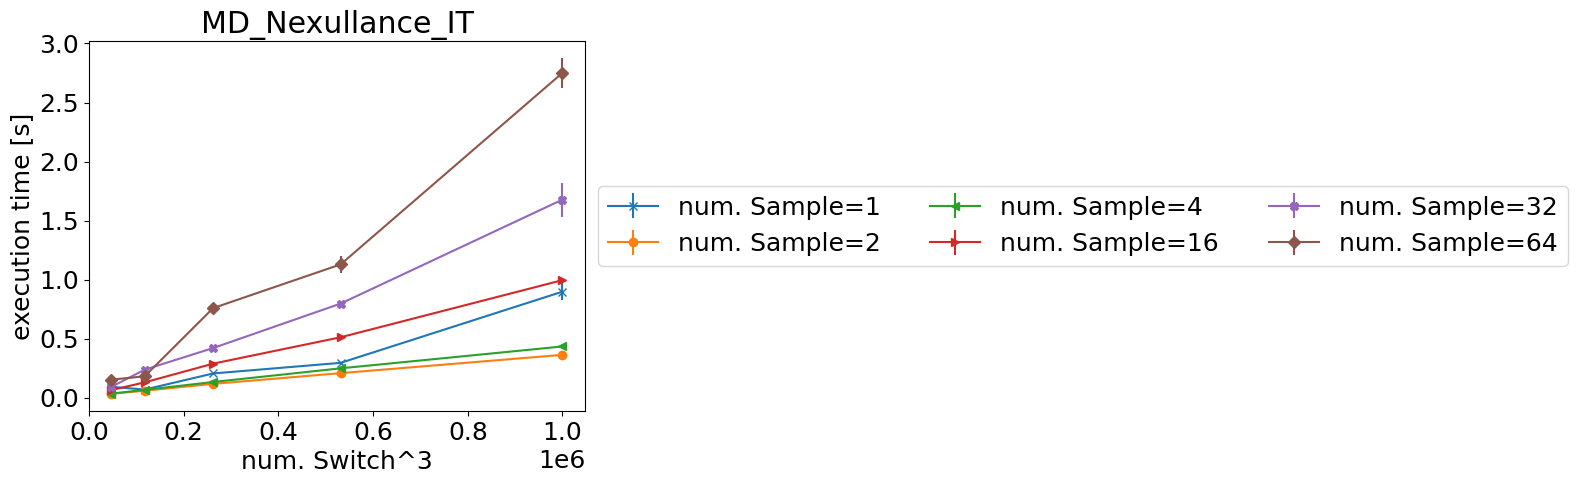

In [11]:
plot_for_method("IT")
plot_for_method("IT", "V", 3)

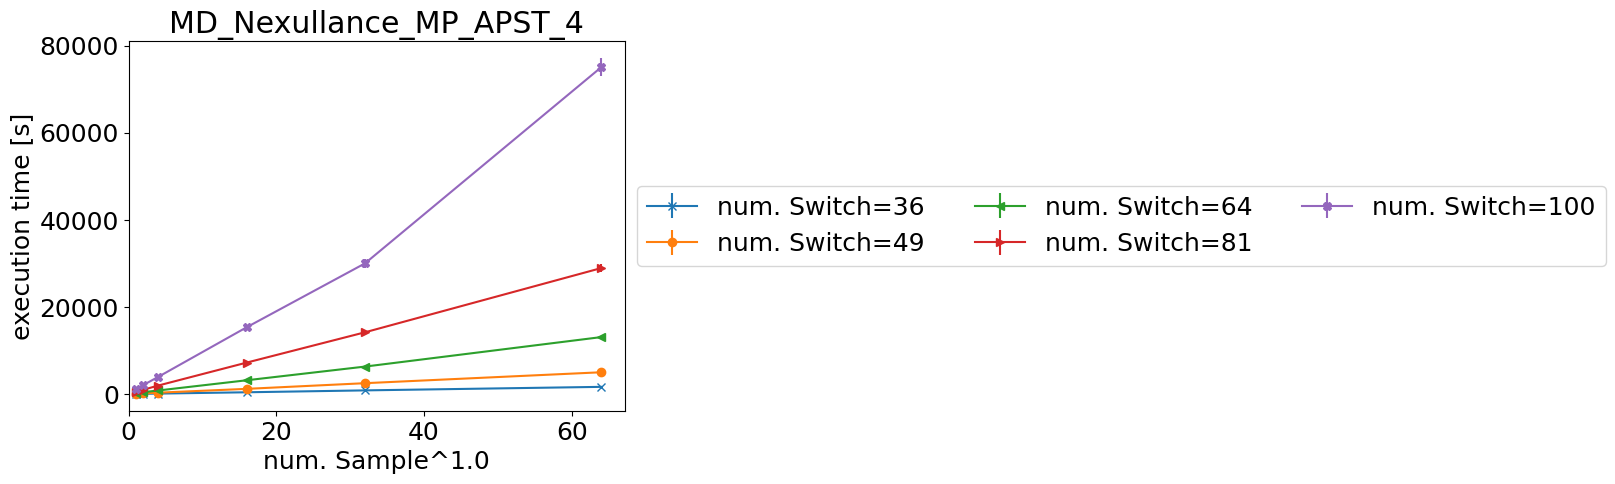

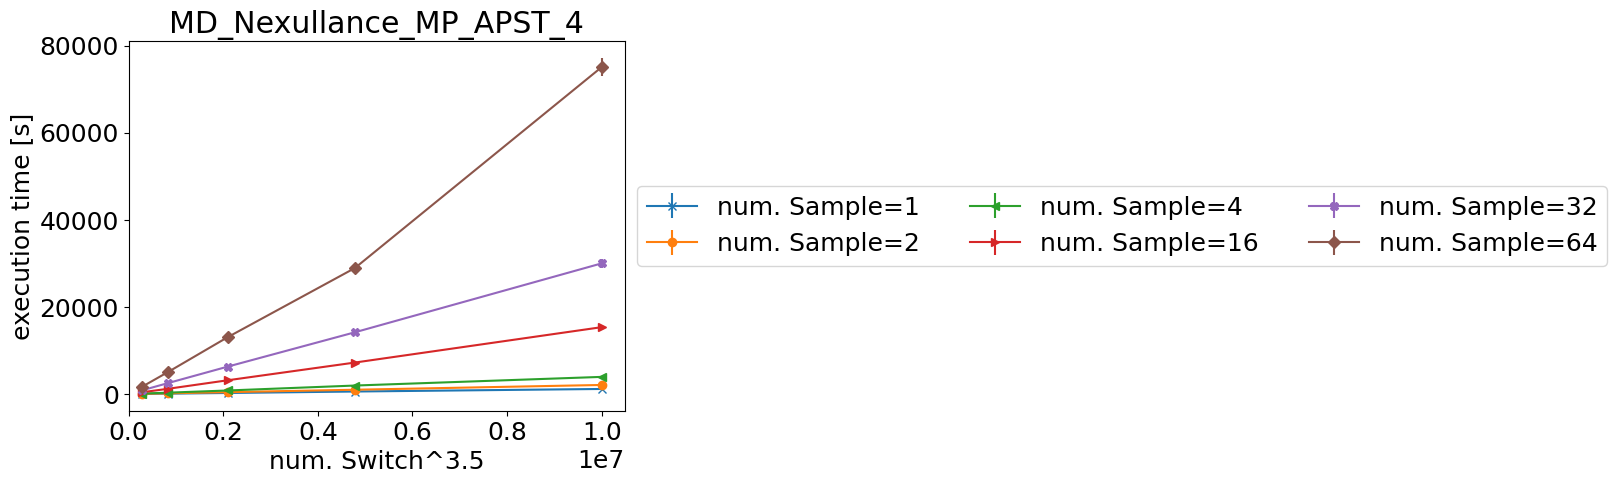

In [10]:
plot_for_method("MP_APST_4")
plot_for_method("MP_APST_4", "V", 3.5)